In [ ]:
import numpy as np
import scanpy as sc
import os
import numpy as np
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from GARDEN import GARDEN
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/root/miniconda3/envs/STAR/lib/R"

cuda:1


In [2]:
adata = sc.read('/home/zhangxinming/mymodel/Data/CNS/CNS3.h5ad')
adata

AnnData object with n_obs × n_vars = 25948 × 1022
    obs: 'Sub_molecular_cell_type', 'Main_molecular_tissue_region', 'Sub_molecular_tissue_region', 'Molecular_spatial_cell_type', 'slice'
    uns: 'Main_molecular_tissue_region_palette'
    obsm: 'spatial', 'spatial_raw'

In [3]:
model = GARDEN.GARDEN(adata,k_dynamic=6,k_cl=5,device=device,model_select = 'KNN')
# train model
adata = model.train()

Constructed graph for CL.
4.0000 neighbors per cell on average.
Constructed graph for Graph Dynamic Attention.
6.0000 neighbors per cell on average.
Begin to train ST data...


100%|██████████| 800/800 [04:47<00:00,  2.79it/s]


Optimization finished for ST data!


In [ ]:
radius = 50
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"
tool = 'mclust' # mclust, leiden, and louvain
n_clusters = 16
# clustering
from GARDEN.utils import clustering
clustering(adata, n_clusters, radius=radius, method=tool, refinement=False) # For DLPFC dataset, we use optional refinement step.

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


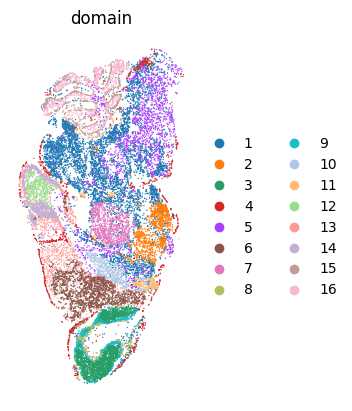

In [5]:
import matplotlib.pyplot as plt
sc.pl.spatial(adata,color = ['domain'],frameon = False,colorbar_loc=None,spot_size=300)